<a href="https://colab.research.google.com/github/cleitonmoya/CPS765_Trabalho2/blob/main/CPS765_Trab2_AnaliseGiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise da rede

In [ ]:
!pip install geopandas

     |████████████████████████████████| 972kB 6.5MB/s 
     |████████████████████████████████| 14.8MB 308kB/s 
     |████████████████████████████████| 6.5MB 51.1MB/s 


In [ ]:
import numpy as np
import networkx as nx
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import random
import statistics as stat
from pandas import DataFrame
from datetime import datetime
import seaborn as sns


## Importação das redes

In [ ]:
!wget 'https://raw.githubusercontent.com/cleitonmoya/CPS765_Trabalho2/main/redes/G085.graphml'
!wget 'https://raw.githubusercontent.com/cleitonmoya/CPS765_Trabalho2/main/redes/S085.graphml'
G = nx.read_graphml('G085.graphml', node_type=int) # Rede completa
S = nx.read_graphml('S085.graphml', node_type=int) # Componente conexa


--2021-01-20 00:49:15--  https://raw.githubusercontent.com/cleitonmoya/CPS765_Trabalho2/main/redes/G085.graphml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5876039 (5.6M) [text/plain]
Saving to: ‘G085.graphml’

G085.graphml        100%[===================>]   5.60M  30.3MB/s    in 0.2s    

2021-01-20 00:49:15 (30.3 MB/s) - ‘G085.graphml’ saved [5876039/5876039]

--2021-01-20 00:49:15--  https://raw.githubusercontent.com/cleitonmoya/CPS765_Trabalho2/main/redes/S085.graphml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4994200 (4.8M) [

In [ ]:
df_mun = pd.read_csv('https://raw.githubusercontent.com/cleitonmoya/CPS765_Trabalho2/main/datasets/municipios.csv', index_col=0, sep=';')
df_mun

,regiao,uf,city,capital,population,idhf,pib,latitude,longitude,porte_pop,porte_idh,porte_pib
cod,,,,,,,,,,,,
1100015,Norte,RO,Alta Floresta D'Oeste,False,22728,0.609139,19611.75,-11.92830,-61.9953,3,2,2
1100023,Norte,RO,Ariquemes,False,109523,0.753049,21389.67,-9.90571,-63.0325,6,3,2
1100031,Norte,RO,Cabixi,False,5188,0.591030,22315.80,-13.49450,-60.5520,2,2,2
1100049,Norte,RO,Cacoal,False,85893,0.748255,24037.91,-11.43430,-61.4562,5,3,2
1100056,Norte,RO,Cerejeiras,False,16204,0.663645,25009.71,-13.18700,-60.8168,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
5222005,Centro-oeste,GO,Vianópolis,False,13977,0.677555,28942.36,-16.74050,-48.5159,3,2,2
5222054,Centro-oeste,GO,Vicentinópolis,False,8873,0.664198,41772.71,-17.73220,-49.8047,2,2,2
5222203,Centro-oeste,GO,Vila Boa,False,6312,0.321381,23992.38,-15.03870,-47.0520,2,1,2


In [ ]:
df_cn = pd.read_csv('https://raw.githubusercontent.com/cleitonmoya/CPS765_Trabalho2/main/datasets/df_cn_mm7.csv', index_col=0, parse_dates=True)

In [ ]:
# Localiza uma ou mais cidades no dataframe  df_mun

axei=df_mun.loc[df_mun.index.isin([5300108,5222302])]
print(axei)


               regiao  uf           city  ...  porte_pop  porte_idh  porte_pib
cod                                       ...                                 
5222302  Centro-oeste  GO  Vila Propício  ...          2          2          2
5300108  Centro-oeste  DF       Brasília  ...          7          3          3

[2 rows x 12 columns]


Visualizando atributos do vértice **Rio de Janeiro**:

In [ ]:
import pprint as pp
D1=G.nodes[3304557]['city']
D2=G.nodes[3304557]
print("Imprime cidade: ",D1)
print("Imprime conteúdo de G.nodes[1234567]")
pp.pprint(D2)
D3=S.degree()
print("Imprime S.degree()", D3)
D4=S.nodes()
print("Imprime S.nodes()",D4)

Imprime cidade:  Rio de Janeiro
Imprime conteúdo de G.nodes[1234567]
{'capital': True,
 'city': 'Rio de Janeiro',
 'idhf': 0.788615,
 'latitude': -22.9129,
 'longitude': -43.2003,
 'pib': 51776.18,
 'population': 6747815,
 'porte_idh': 3,
 'porte_pib': 3,
 'porte_pop': 7,
 'regiao': 'Sudeste',
 'uf': 'RJ'}
Imprime S.degree() [(1100015, 65), (1100023, 106), (1100049, 112), (1100056, 48), (1100080, 65), (1100098, 73), (1100106, 63), (1100114, 38), (1100122, 156), (1100130, 156), (1100148, 81), (1100155, 23), (1100189, 8), (1100205, 26), (1100254, 45), (1100262, 6), (1100288, 5), (1100304, 207), (1100320, 9), (1100338, 1), (1100346, 8), (1100403, 49), (1100452, 19), (1100601, 1), (1100809, 3), (1100924, 5), (1101104, 14), (1101203, 1), (1101401, 1), (1101468, 11), (1101484, 2), (1101492, 7), (1101609, 7), (1101708, 6), (1200054, 6), (1200104, 1), (1200138, 38), (1200179, 15), (1200252, 3), (1200302, 59), (1200336, 2), (1200344, 17), (1200385, 3), (1200401, 6), (1200500, 13), (1200708, 52)

In [ ]:
m1 = [ item for item in S.nodes() ]
m2=[[i,j, 0] for i in m1 for j in m1]
for i in range(len(m2)):
  if m2[i][1] < m2[i][0]:
    x = m2[i][0]
    m2[i][0] = m2[i][1]
    m2[i][1] = x
  m3=[]
  for i in range(len(m2)):
    if m2[i][1] != m2[i][0]:
      m3.append(m2[i])
m3Or1 = sorted(m3, key = lambda x: x[0]+x[1])
# print("m3Or1",m3Or1)

  


In [ ]:
# a1 = m3Or1
# a2 = m3Or2
m3Or2=[]
m3Or2.append(m3Or1[0])
for i in range(1,len(m3Or1)):
  if (m3Or1[i][0] == m3Or1[i-1][0] and m3Or1[i][1] == m3Or1[i-1][1]):
    continue
  else:
    m3Or2.append(m3Or1[i])
p1 = m3Or2[:5]
print(p1)
p1 = m3Or2[-5:]
print(p1)


[[1100015, 1100023, 0], [1100015, 1100049, 0]]
[[1100015, 1100049, 0], [1100023, 1100049, 0]]


In [ ]:
x = {att['city']:val 
 for (node1, val) in S.degree()
 for (node2, att) in S.nodes(data=True)
 if node1==node2 and val>0} 
sorted(x.items(), key=lambda item: item[1], reverse=True)[:10]

[('São José do Rio Preto', 293),
 ('Barreiras', 281),
 ("Santa Bárbara d'Oeste", 270),
 ('Americana', 261),
 ('Santa Rosa', 261),
 ('Campina Grande do Sul', 259),
 ('Vinhedo', 253),
 ('Valinhos', 246),
 ('Atibaia', 245),
 ('São José dos Campos', 240)]

## Visualização

/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


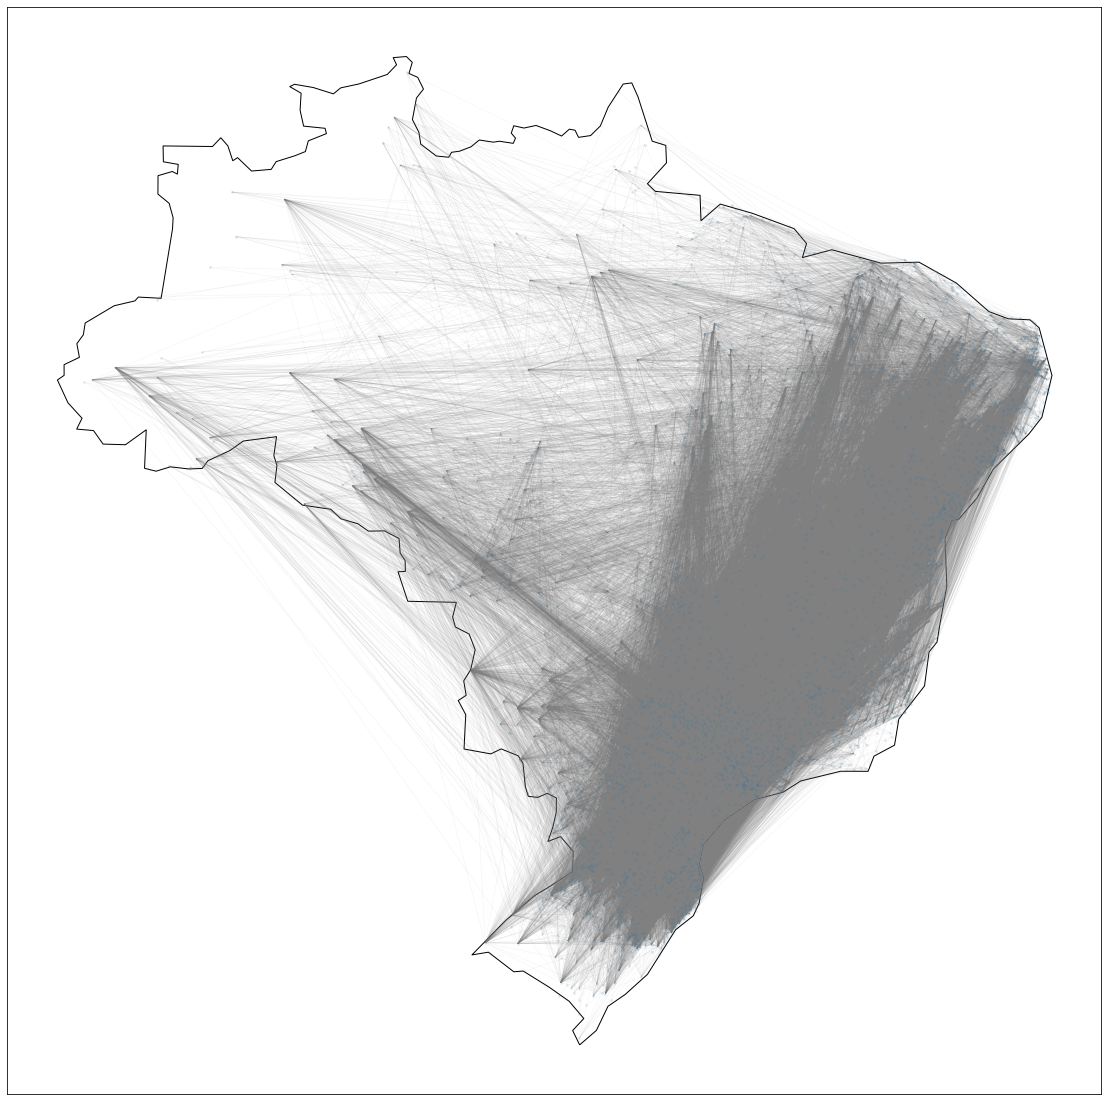

In [ ]:
# MAPEAMENTO DA COMPONENTE CONEXA GIGANTE
gdf = geopandas.GeoDataFrame()
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to Brazil.
ax = world[world.name == 'Brazil'].plot(
    color='white', edgecolor='black', figsize=(20,20))

pos = {c: (att['longitude'], att['latitude']) for c,att in S.nodes(data=True) }
# draw
nx.draw_networkx(S, pos, node_size=3, edge_color='grey', alpha=0.1, width=0.5, with_labels=False, ax=ax)

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')
plt.show()

/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


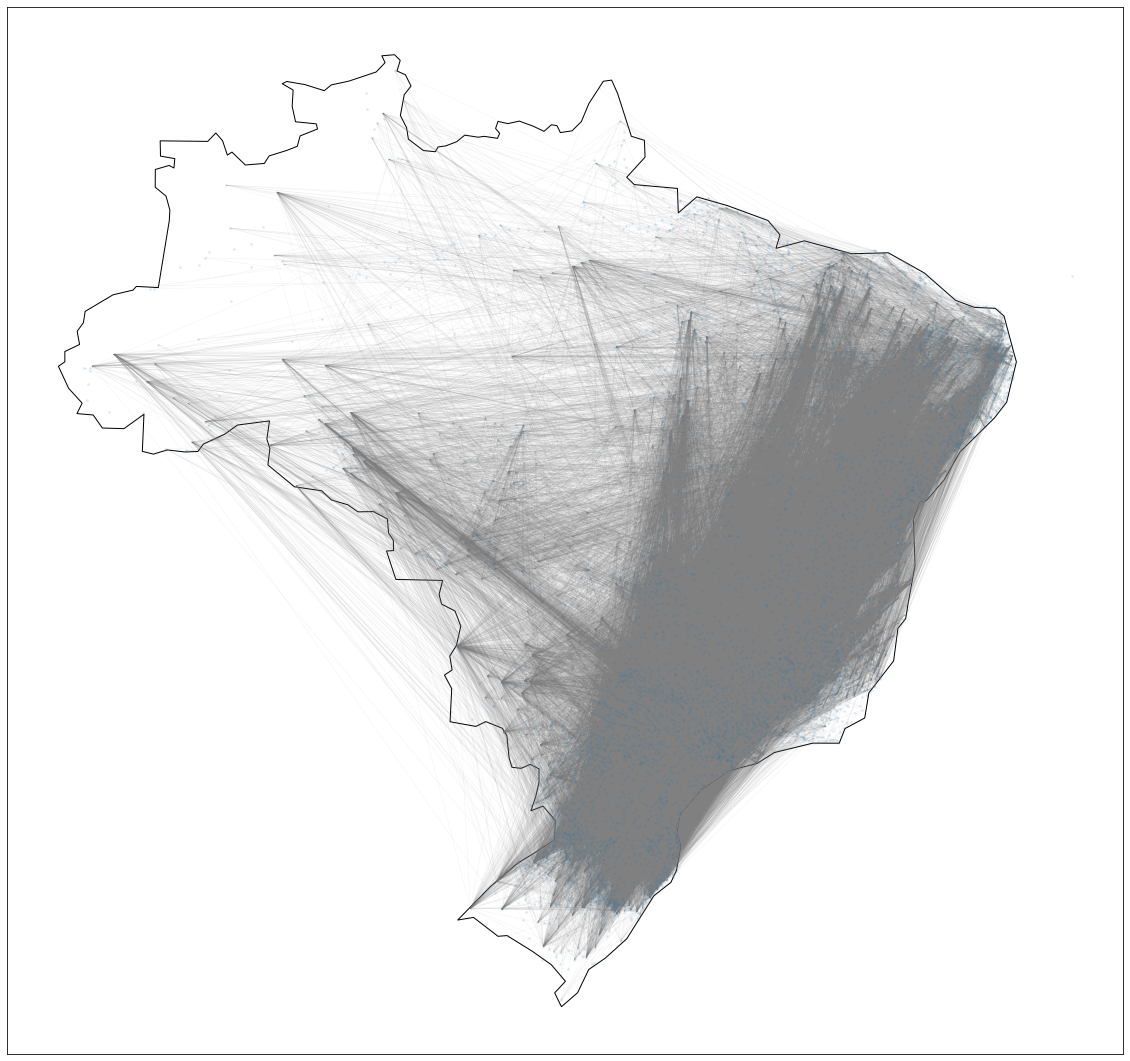

In [ ]:
# MAPEAMENTO DA REDE COMPLETA

gdf = geopandas.GeoDataFrame()
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to Brazil.
ax = world[world.name == 'Brazil'].plot(
    color='white', edgecolor='black', figsize=(20,20))

pos = {c: (att['longitude'], att['latitude']) for c,att in G.nodes(data=True) }
# draw
nx.draw_networkx(G, pos, node_size=3, edge_color='grey', alpha=0.1, width=0.5, with_labels=False, ax=ax)

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')
plt.show()


Centralidade de Grau


Município  1100338 com Grau Mínimo 0.00029682398337785694
        regiao  uf         city  ...  porte_pop  porte_idh  porte_pib
cod                              ...                                 
1100338  Norte  RO  Nova Mamoré  ...          4          1          2

[1 rows x 12 columns]
Município  3549805 com Grau Máximo 0.08696942712971209
          regiao  uf                   city  ...  porte_pop  porte_idh  porte_pib
cod                                          ...                                 
3549805  Sudeste  SP  São José do Rio Preto  ...          6          4          2

[1 rows x 12 columns]
Grau Mínimo e Grau Máximo
      cod_ibge  central_grau
1684   3155603          0.00
2338   3556008          0.00
537    2305209          0.00
540    2305332          0.00
3252   5204409          0.00
...        ...           ...
1902   3501608          0.08
2976   4317202          0.08
2260   3545803          0.08
1076   2903201          0.08
2286   3549805          0.09

[3370 rows

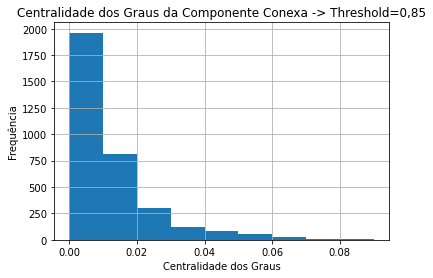

In [ ]:
d1 = nx.degree_centrality(S)

# Acha municípios com graus mínimo e máximo

maximum = max(d1, key=d1.get)
minimum = min(d1, key=d1.get)
axei=df_mun.loc[df_mun.index.isin([minimum])]
print("Município ", minimum, "com Grau Mínimo",d1[minimum])
print(axei)
axei=df_mun.loc[df_mun.index.isin([maximum])]
print("Município ", maximum, "com Grau Máximo",d1[maximum])
print(axei)

df1 = pd.DataFrame.from_dict(d1, orient="index").reset_index()
# print("Aqui df1 = ", df1)
df1.columns = ["cod_ibge","central_grau"]
df1.sort_values(by='central_grau', inplace=True, ascending=True)
print("Grau Mínimo e Grau Máximo")
df1['central_grau'] = round(df1['central_grau'], 2) 
print(df1)
def compute_histogram_bins(data, desired_bin_size):
    min_val = np.min(data)
    max_val = np.max(data)
    min_boundary = -1.0 * (min_val % desired_bin_size - min_val)
    max_boundary = max_val - max_val % desired_bin_size + desired_bin_size
    n_bins = int((max_boundary - min_boundary) / desired_bin_size) + 1
    bins = np.linspace(min_boundary, max_boundary, n_bins)
    return bins
bins = compute_histogram_bins(df1.central_grau, 0.01)
plt.hist(df1.central_grau, bins=bins)
plt.xlabel('Centralidade dos Graus')
plt.ylabel('Frequência')
plt.title('Centralidade dos Graus da Componente Conexa -> Threshold=0,85')
plt.grid(True)
plt.show()



Município  1100338 com Centralidade de Grau Mínima 0.00029682398337785694
        regiao  uf         city  ...  porte_pop  porte_idh  porte_pib
cod                              ...                                 
1100338  Norte  RO  Nova Mamoré  ...          4          1          2

[1 rows x 12 columns]
Município  3549805 com Centralidade de Grau Máxima 0.08696942712971209
          regiao  uf                   city  ...  porte_pop  porte_idh  porte_pib
cod                                          ...                                 
3549805  Sudeste  SP  São José do Rio Preto  ...          6          4          2

[1 rows x 12 columns]
      cod_ibge  central_grau
1684   3155603      0.000297
2338   3556008      0.000297
537    2305209      0.000297
540    2305332      0.000297
3252   5204409      0.000297
...        ...           ...
1902   3501608      0.077471
2976   4317202      0.077471
2260   3545803      0.080142
1076   2903201      0.083408
2286   3549805      0.086969

[337

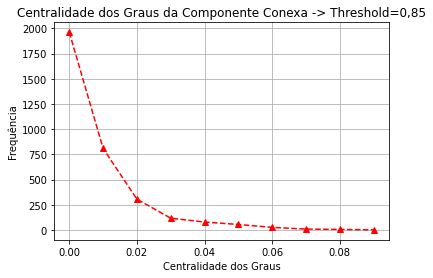

In [ ]:
d1 = nx.degree_centrality(S)

maximum = max(d1, key=d1.get)
minimum = min(d1, key=d1.get)
axei=df_mun.loc[df_mun.index.isin([minimum])]
print("Município ", minimum, "com Centralidade de Grau Mínima",d1[minimum])
print(axei)
axei=df_mun.loc[df_mun.index.isin([maximum])]
print("Município ", maximum, "com Centralidade de Grau Máxima",d1[maximum])
print(axei)


df1 = pd.DataFrame.from_dict(d1, orient="index").reset_index()
df1.columns = ["cod_ibge","central_grau"]
df1.sort_values(by='central_grau', inplace=True, ascending=True)
print(df1)
df1['central_grau'] = round(df1['central_grau'], 2)
print(df1)
df2=pd.DataFrame(df1.groupby(['central_grau'], as_index = False).count())
print(df2)
lista = df2.values.tolist()
x=[]
for i in range(len(lista)):
  x.append(lista[i][0])
print(x)
y=[]
for i in range(len(lista)):
  y.append(lista[i][1])
print(y)
plt.xlabel('Centralidade dos Graus')
plt.ylabel('Frequência')
plt.title('Centralidade dos Graus da Componente Conexa -> Threshold=0,85')
plt.grid(True)
plt.plot(x,y, 'r^', linestyle='--')
plt.show()








[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
[1.0, 0.41780415430267065, 0.1777448071216617, 0.08694362017804154, 0.05222551928783383, 0.028783382789317507, 0.012462908011869436, 0.004747774480712166, 0.0020771513353115725, 0.0002967359050445104]


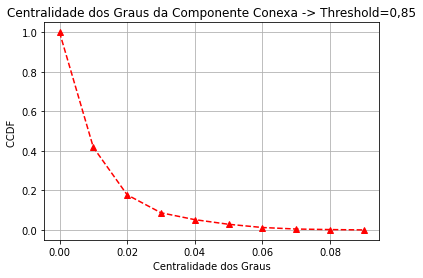

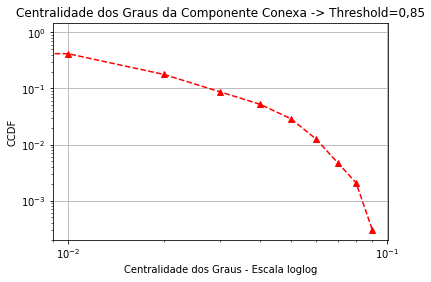

In [ ]:
print(x)
y1=y.copy()
somay=sum(y1)
y1[0]=somay
lim= len(y1)-1
for i in range(1,lim):
  y1[i]=y1[i-1]-y[i-1]
for i in range(len(y1)):
  y1[i] = y1[i]/somay
print(y1)
plt.xlabel('Centralidade dos Graus')
plt.ylabel('CCDF ')
plt.title('Centralidade dos Graus da Componente Conexa -> Threshold=0,85')
plt.grid(True)
plt.plot(x,y1, 'r^', linestyle='--')
plt.show()
plt.xlabel('Centralidade dos Graus - Escala loglog')
plt.ylabel('CCDF')
plt.title('Centralidade dos Graus da Componente Conexa -> Threshold=0,85')
plt.grid(True)
plt.loglog(x,y1, 'r^', linestyle='--')
plt.show()




In [ ]:
# APURAÇÃO DA CENTRALIDADE DE BETWEENNESS
cbet = nx.betweenness_centrality(S)

In [ ]:
print(cbet)
maximum = max(cbet, key=cbet.get)
minimum = min(cbet, key=cbet.get)

axei=df_mun.loc[df_mun.index.isin([minimum])]
print("Município ", minimum, "com Central Between Mínima",cbet[minimum])
print(axei)
axei=df_mun.loc[df_mun.index.isin([maximum])]
print("Município ", maximum, "com Central Between Máxima",cbet[maximum])
print(axei)

# temos muitos vértices com centralidade de betweenness = 0.0  e um vértice com centralidade de betweenness máxima = 0.0526...
for i in cbet:
  if cbet[i] == 0.05264667871874501:
    print (i, cbet[i])

#  if cbet[i] == 0.0:
#    print (i, cbet[i])  

{1100015: 0.0010580197814967405, 1100023: 0.0022910190866558128, 1100049: 0.0018640224851473879, 1100056: 3.705771579637075e-05, 1100080: 0.001004828781415335, 1100098: 0.00014952833374553951, 1100106: 0.007959209937393286, 1100114: 0.0059980989245121, 1100122: 0.008350597911249142, 1100130: 0.002780725358203523, 1100148: 0.0018071270654167165, 1100155: 6.596744100745469e-05, 1100189: 6.934035014479168e-07, 1100205: 0.004733169035946166, 1100254: 5.777113172522718e-05, 1100262: 1.9612247656348464e-06, 1100288: 1.3680190677610539e-07, 1100304: 0.004963737846361101, 1100320: 6.730529182738025e-05, 1100338: 0.0, 1100346: 1.0777161016837215e-07, 1100403: 0.00032679333042229036, 1100452: 6.497790512062423e-05, 1100601: 0.0, 1100809: 0.0005966826120010529, 1100924: 3.3233927865027523e-06, 1101104: 4.574917736341729e-06, 1101203: 0.0, 1101401: 0.0, 1101468: 8.104368439842868e-06, 1101484: 0.0, 1101492: 2.361976718456728e-05, 1101609: 6.73900741503927e-07, 1101708: 2.4881760392327424e-06, 1200

In [ ]:
# APURAÇÃO DA CENTRALIDADE DE CLOSENESS
ccen = nx.closeness_centrality(S)

In [ ]:
for i in ccen:
  j=ccen[i]
  ccen[i]= (1.0 / j)
print(ccen)
maximum = max(ccen, key=ccen.get)
minimum = min(ccen, key=ccen.get)

axei=df_mun.loc[df_mun.index.isin([minimum])]
print("Município ", minimum, "com Central Closeness Mínima",ccen[minimum])
print(axei)
axei=df_mun.loc[df_mun.index.isin([maximum])]
print("Município ", maximum, "com Central Closeness Máxima",ccen[maximum])
print(axei)


{1100015: 3.7376075986939745, 1100023: 3.533986346096764, 1100049: 3.6527159394479076, 1100056: 3.726625111308994, 1100080: 3.981003265063817, 1100098: 3.631938260611457, 1100106: 4.56930840011873, 1100114: 4.030276046304541, 1100122: 3.4861976847729297, 1100130: 3.5485307212822796, 1100148: 3.7812407242505195, 1100155: 3.9946571682991987, 1100189: 4.208370436331256, 1100205: 4.347284060552092, 1100254: 3.8239833778569308, 1100262: 4.248738498070645, 1100288: 4.067379044226773, 1100304: 3.343425348768181, 1100320: 7.324428613831997, 1100338: 4.788958147818344, 1100346: 4.180468981893737, 1100403: 3.616503413475809, 1100452: 3.948352626892253, 1100601: 5.42238052834669, 1100809: 5.915405164737311, 1100924: 4.507569011576135, 1101104: 4.571682991985752, 1101203: 6.554764024933215, 1101401: 4.971801721579103, 1101468: 4.1685960225586225, 1101484: 4.991392104482042, 1101492: 4.767883644998515, 1101609: 4.3739982190561, 1101708: 4.707628376372811, 1200054: 4.20362125259721, 1200104: 5.08132

In [ ]:
ccena = np.array([ item for item in ccen.values()])
print(ccena)
print('Máximo:', ccena.max())
print('Mínimo:', ccena.min())
print('Média:', ccena.mean())
print('Mediana:', np.median(ccena))
print('Desvio padrão:', ccena.std())

[3.7376076  3.53398635 3.65271594 ... 4.77589789 3.62273672 3.37845058]
Máximo: 12.303650934995549
Mínimo: 3.151380231522707
Média: 4.9948697893958975
Mediana: 4.6898189373701396
Desvio padrão: 1.2311651029018749


/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


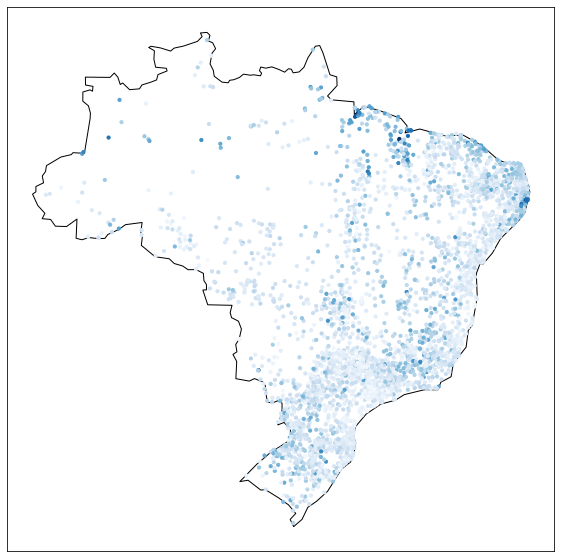

In [ ]:
gdf = geopandas.GeoDataFrame()
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to Brazil.
ax = world[world.name == 'Brazil'].plot(
    color='white', edgecolor='black', figsize=(10,10))

pos = {c: (att['longitude'], att['latitude']) for c,att in G.nodes(data=True) }

nx.draw_networkx_nodes(S, pos, node_size=10, node_color=ccena, cmap=plt.cm.Blues, ax=ax,  alpha=1)

# Plota as arestas da rede com todas as cidades ( cluster local = 0 e cluster local = 1)
# tot_zeroum = list_zerok + list_umk
# nx.draw_networkx_edges(G, pos, G.edges(tot_zeroum), edge_color='grey', alpha=0.5, width=0.5, ax=ax)

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')
plt.show()

In [ ]:
sorted({(S.nodes[cid]['city'], S.nodes[cid]['uf'], cid):ccen[cid]
     for cid in S.nodes
     }.items(), key=lambda tup: tup[1], reverse=True)[:10]

[(('Viana', 'MA', 2112803), 12.303650934995549),
 (('Santa Bárbara do Pará', 'PA', 1506351), 11.304244582962303),
 (('Guia Lopes da Laguna', 'MS', 5004106), 11.303947758978925),
 (('Paço do Lumiar', 'MA', 2107506), 10.922232116355001),
 (('Igarassu', 'PE', 2606804), 10.912140100920155),
 (('Ananindeua', 'PA', 1500800), 10.911843276936775),
 (('Belém', 'PA', 1501402), 10.911546452953399),
 (('Palmeirândia', 'MA', 2107605), 10.305135054912437),
 (('São Lourenço da Mata', 'PE', 2613701), 10.274562184624518),
 (('Bacabeira', 'MA', 2101251), 10.269516176907095)]

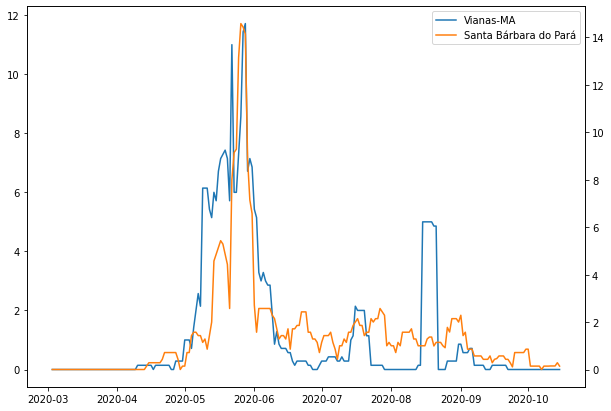

In [ ]:
fig,ax1 = plt.subplots(figsize=(10,7))
l1 = ax1.plot(df_cn['2112803'], label='Vianas-MA')
ax2 = ax1.twinx()
l2=ax2.plot(df_cn['1506351'], c='C1', label='Santa Bárbara do Pará')
lns = l1+l2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)
plt.show()

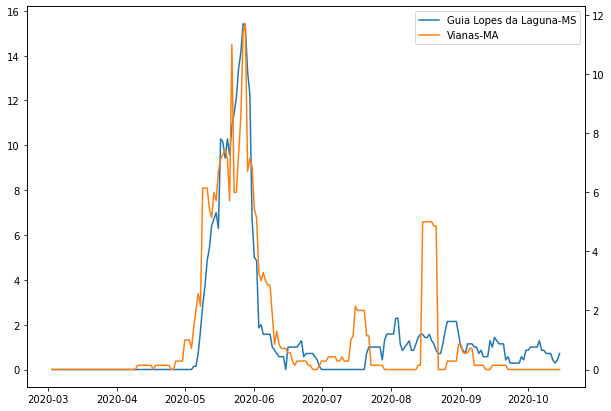

In [ ]:
fig,ax1 = plt.subplots(figsize=(10,7))
l1 = ax1.plot(df_cn['5004106'], label='Guia Lopes da Laguna-MS')
ax2 = ax1.twinx()
l2=ax2.plot(df_cn['2112803'], c='C1', label='Vianas-MA')
lns = l1+l2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)
plt.show()

In [ ]:
# APURAÇÃO DO PAGERANK
pgrnk=nx.pagerank(S)
print(pgrnk)

{1100015: 0.00045021893996954155, 1100023: 0.0006613777777983071, 1100049: 0.0007032716041703861, 1100056: 0.00028062234381333583, 1100080: 0.0005092223958142846, 1100098: 0.0004374405251472041, 1100106: 0.0008974921146338149, 1100114: 0.00046285757050514926, 1100122: 0.0009359140985798287, 1100130: 0.0008936266147957462, 1100148: 0.0005590308888144018, 1100155: 0.00017430831368043037, 1100189: 0.00010080504738648975, 1100205: 0.00048669282467090746, 1100254: 0.00027772417594800023, 1100262: 9.006013112624093e-05, 1100288: 7.315200189730601e-05, 1100304: 0.0011362890551721526, 1100320: 0.00026442819750239577, 1100338: 5.376403000998936e-05, 1100346: 8.449988042296577e-05, 1100403: 0.00031071229538423063, 1100452: 0.0001683289443516381, 1100601: 5.661035690923669e-05, 1100809: 0.00019866055091623673, 1100924: 8.191210784867843e-05, 1101104: 0.00018501488745381023, 1101203: 9.713512403467249e-05, 1101401: 5.5527191958153744e-05, 1101468: 0.00012298226902273787, 1101484: 6.326026692672785

In [ ]:
maximum = max(pgrnk, key=pgrnk.get)
minimum = min(pgrnk, key=pgrnk.get)

axei=df_mun.loc[df_mun.index.isin([minimum])]
print("Município ", minimum, "com Pagerank Mínima",pgrnk[minimum])
print(axei)
axei=df_mun.loc[df_mun.index.isin([maximum])]
print("Município ", maximum, "com Pagerank Máxima",pgrnk[maximum])
print(axei)


Município  3512100 com Pagerank Mínima 4.922700056172672e-05
          regiao  uf      city  ...  porte_pop  porte_idh  porte_pib
cod                             ...                                 
3512100  Sudeste  SP  Colômbia  ...          2          4          3

[1 rows x 12 columns]
Município  3549805 com Pagerank Máxima 0.0015765468966653846
          regiao  uf                   city  ...  porte_pop  porte_idh  porte_pib
cod                                          ...                                 
3549805  Sudeste  SP  São José do Rio Preto  ...          6          4          2

[1 rows x 12 columns]


In [ ]:
# Cálculo da Clusterização Global com  G  e com S (maior componente conexa)
cg_G = nx.average_clustering(G)
print("Clusterização Global - Rede Completa G = ", cg_G)
cg_S = nx.average_clustering(S)
print("Clusterização Global - Maior Componente Conexa S = ", cg_S)


Clusterização Global - Rede Completa G =  0.260543841236332
Clusterização Global - Maior Componente Conexa S =  0.4260540015366369


In [ ]:
# Cálculo da Clusterização Local - para cada vértice
clul = nx.clustering(S)
print (clul)

maximum = max(clul, key=clul.get)
minimum = min(clul, key=clul.get)

axei=df_mun.loc[df_mun.index.isin([minimum])]
print("Município ", minimum, "com Clusterização Local Mínima",clul[minimum])
print(axei)
axei=df_mun.loc[df_mun.index.isin([maximum])]
print("Município ", maximum, "com Clusterização Local Máxima",clul[maximum])
print(axei)
clulan = np.array([ item for item in clul.values()])
print(clulan)
print('Máximo:', clulan.max())
print('Mínimo:', clulan.min())
print('Média:', clulan.mean())
print('Mediana:', np.median(clulan))
print('Desvio padrão:', clulan.std())


{1100015: 0.5360576923076923, 1100023: 0.3886792452830189, 1100049: 0.4391891891891892, 1100056: 0.725177304964539, 1100080: 0.36201923076923076, 1100098: 0.5780060882800608, 1100106: 0.28366615463389655, 1100114: 0.28591749644381226, 1100122: 0.3794044665012407, 1100130: 0.4116625310173697, 1100148: 0.4351851851851852, 1100155: 0.6205533596837944, 1100189: 0.75, 1100205: 0.3630769230769231, 1100254: 0.6131313131313131, 1100262: 0.5333333333333333, 1100288: 0.9, 1100304: 0.32925284930350357, 1100320: 0.6388888888888888, 1100338: 0, 1100346: 0.8571428571428571, 1100403: 0.5501700680272109, 1100452: 0.47953216374269003, 1100601: 0, 1100809: 0, 1100924: 0.8, 1101104: 0.6263736263736264, 1101203: 0, 1101401: 0, 1101468: 0.7272727272727273, 1101484: 1.0, 1101492: 0.42857142857142855, 1101609: 0.9523809523809523, 1101708: 0.6, 1200054: 0.4666666666666667, 1200104: 0, 1200138: 0.3869132290184922, 1200179: 0.5142857142857142, 1200252: 0, 1200302: 0.5523085914669784, 1200336: 1.0, 1200344: 0.41

In [ ]:
clul_zero=0
clul_um=0
list_umk=[]
list_zerok=[]
for municipio in clul:
  cluloc = clul[municipio]
  if cluloc == 0:
    clul_zero=clul_zero+1
    list_zerok.append(municipio)
  if cluloc == 1:
    clul_um=clul_um+1
    list_umk.append(municipio)
print("Total de vértices com Clusterização   Um =  ", clul_um, list_umk)
print("Total de vértices com Clusterização Zero = ", clul_zero, list_zerok)

norte = [item for item in list_umk if (item > 1100000 and item < 2000000)]










Total de vértices com Clusterização   Um =   207 [1101484, 1200336, 1301951, 1303700, 1500800, 1503093, 1505403, 1506351, 1507953, 1600501, 1708254, 1709807, 1711803, 1713809, 1714302, 1715705, 1717206, 2100436, 2100832, 2102606, 2103174, 2103802, 2105500, 2105609, 2106359, 2106375, 2107357, 2108207, 2108405, 2111508, 2200251, 2201929, 2202307, 2202505, 2204550, 2205581, 2206050, 2209153, 2209203, 2210052, 2210938, 2303402, 2305001, 2305407, 2307007, 2307635, 2308807, 2311231, 2402402, 2403103, 2404101, 2406809, 2409605, 2500775, 2505709, 2510402, 2512804, 2516102, 2600609, 2605707, 2609303, 2610301, 2612000, 2612802, 2613701, 2700607, 2701100, 2703502, 2705200, 2705705, 2708402, 2709152, 2801900, 2803609, 2807501, 2900801, 2901106, 2908101, 2915502, 2919306, 2919405, 2920205, 2921401, 2921906, 2923704, 2925501, 2928059, 3101300, 3101706, 3103207, 3103306, 3107000, 3115474, 3115706, 3115904, 3117108, 3119609, 3121803, 3122603, 3123403, 3123908, 3126950, 3127602, 3133303, 3138682, 31419

/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


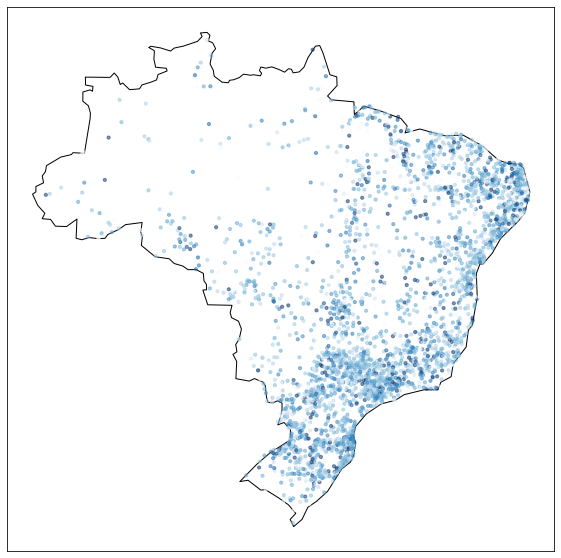

In [ ]:
# MAPA DE CLUSTERIZAÇÃO LOCAL - VERTICES COM INTENSIDADE DE COR PROP AO VALOR ABSOLUTO
gdf = geopandas.GeoDataFrame()
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to Brazil.
ax = world[world.name == 'Brazil'].plot(
    color='white', edgecolor='black', figsize=(10,10))

pos = {c: (att['longitude'], att['latitude']) for c,att in G.nodes(data=True) }

nx.draw_networkx_nodes(S, pos, node_size=10, node_color=clulan, cmap=plt.cm.Blues, ax=ax,  alpha=0.5)

# Plota as arestas da rede com todas as cidades ( cluster local = 0 e cluster local = 1)
# tot_zeroum = list_zerok + list_umk
# nx.draw_networkx_edges(G, pos, G.edges(tot_zeroum), edge_color='grey', alpha=0.5, width=0.5, ax=ax)

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')
plt.show()

In [ ]:
clulan

/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


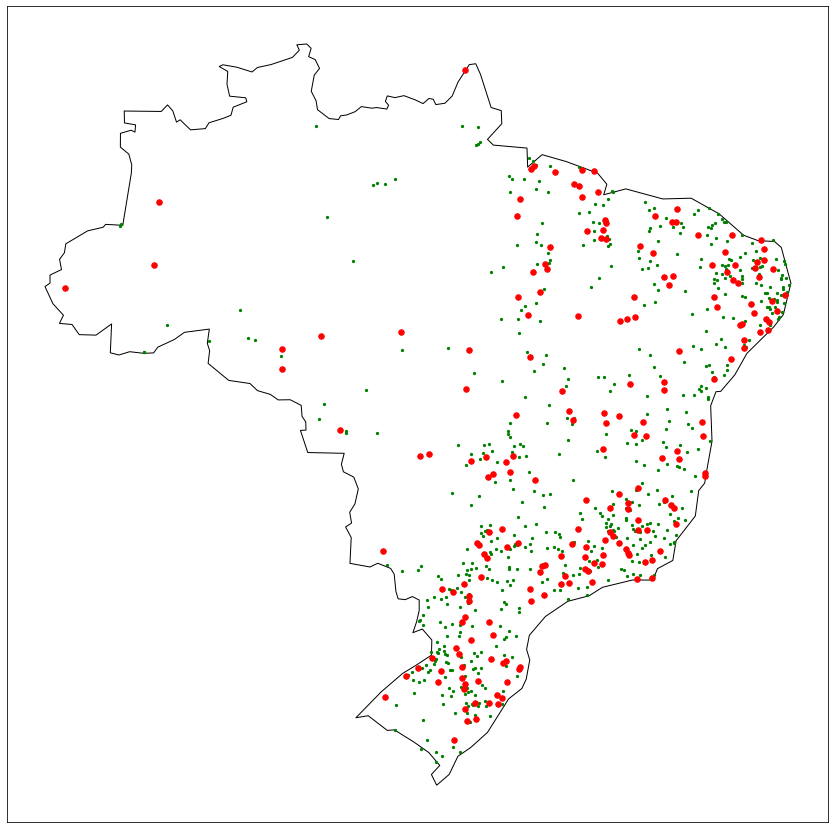

In [ ]:
gdf = geopandas.GeoDataFrame()
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to Brazil.
ax = world[world.name == 'Brazil'].plot(
    color='white', edgecolor='black', figsize=(15,15))

pos = {c: (att['longitude'], att['latitude']) for c,att in G.nodes(data=True) }

# Plota as cidades com Clusterização Local = 0
nx.draw_networkx_nodes(S, pos, list_zerok, node_size=5, node_color="green", ax=ax)

# Plota as cidades com Clusterização Local = 1
nx.draw_networkx_nodes(S, pos, list_umk, node_size=30, node_color='red', ax=ax)

# Plota as arestas da rede com todas as cidades ( cluster local = 0 e cluster local = 1)
# tot_zeroum = list_zerok + list_umk
# nx.draw_networkx_edges(G, pos, G.edges(tot_zeroum), edge_color='grey', alpha=0.5, width=0.5, ax=ax)

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')
plt.show()

In [ ]:
# ASSORTATIVIDADE
xassrt= nx.degree_assortativity_coefficient(S)
print("Coeficiente de Assortatividade em relação ao Grau = ",xassrt)
print("Coeficiente de Assortatividade em relação à UF = ",nx.attribute_assortativity_coefficient(S, "uf"))
print("Coeficiente de Assortatividade em relação ao Porte de IDH = ", nx.numeric_assortativity_coefficient(S, "porte_idh"))
print("Coeficiente de Assortatividade em relação ao Porte de População = ",nx.numeric_assortativity_coefficient(S, "porte_pop"))


Coeficiente de Assortatividade em relação ao Grau =  0.31981102767524144
Coeficiente de Assortatividade em relação à UF =  0.14540150664163032
Coeficiente de Assortatividade em relação ao Porte de IDH =  0.18378721118172467
Coeficiente de Assortatividade em relação ao Porte de População =  0.26260982548192535


In [ ]:
adad = [(u, v, j) for (u, v, j) in nx.adamic_adar_index(S, ebunch=None)]

In [ ]:
print(adad)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
a_coef = np.array([j for (u, v, j) in adad])
print('Máximo:', a_coef.max())
print('Mínimo:', a_coef.min())
print('Média:', a_coef.mean())
print('Mediana:', np.median(a_coef))
print('Desvio padrão:', a_coef.std())

Máximo: 16.87071441712986
Mínimo: 0.0
Média: 0.0966899032654071
Mediana: 0.0
Desvio padrão: 0.5592829966944197


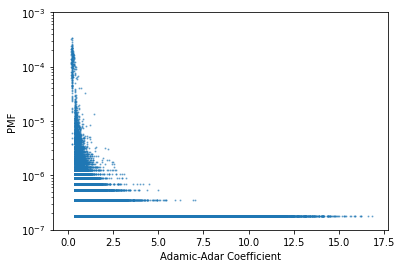

In [ ]:
x, f = np.unique(a_coef, return_counts=True)
pmf = f/f.sum()
plt.scatter(x,pmf, alpha=0.5, s=1)
plt.xlabel('Adamic-Adar Coefficient')
plt.ylabel('PMF')
plt.yscale('log')
plt.ylim(10**-7, 10**-3)
plt.show()

In [ ]:
from math import sin, cos, atan2, sqrt, radians
def calculaDist(cid1,cid2):
  lat1 = radians(cid1[0])
  lon1 = radians(cid1[1])
  lat2 = radians(cid2[0])
  lon2 = radians(cid2[1])

  dlat = lat2-lat1
  dlon = lon2-lon1

  # Fórmula de Haversine
  R = 6373.0 # Raio da terra (km)
  a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
  c = 2 * atan2(sqrt(a), sqrt(1 - a))

  dist = R*c
  return dist

In [ ]:
import pprint as pp
D2=G.nodes[2112803]
print("Imprime cidade: ",D2)
print("Imprime conteúdo de G.nodes[1234567]")
pp.pprint(D2)
D2=G.nodes[5219712]
print("Imprime cidade: ",D2)
print("Imprime conteúdo de G.nodes[1234567]")
pp.pprint(D2)

Imprime cidade:  {'regiao': 'Nordeste', 'uf': 'MA', 'city': 'Viana', 'capital': False, 'population': 52649, 'idhf': 0.588275, 'pib': 7910.74, 'latitude': -3.20451, 'longitude': -44.9912, 'porte_pop': 5, 'porte_idh': 2, 'porte_pib': 1}
Imprime conteúdo de G.nodes[1234567]
{'capital': False,
 'city': 'Viana',
 'idhf': 0.588275,
 'latitude': -3.20451,
 'longitude': -44.9912,
 'pib': 7910.74,
 'population': 52649,
 'porte_idh': 2,
 'porte_pib': 1,
 'porte_pop': 5,
 'regiao': 'Nordeste',
 'uf': 'MA'}
Imprime cidade:  {'regiao': 'Centro-oeste', 'uf': 'GO', 'city': 'Santo Antônio da Barra', 'capital': False, 'population': 4854, 'idhf': 0.7489779999999999, 'pib': 38355.1, 'latitude': -17.5585, 'longitude': -50.6345, 'porte_pop': 1, 'porte_idh': 3, 'porte_pib': 2}
Imprime conteúdo de G.nodes[1234567]
{'capital': False,
 'city': 'Santo Antônio da Barra',
 'idhf': 0.7489779999999999,
 'latitude': -17.5585,
 'longitude': -50.6345,
 'pib': 38355.1,
 'population': 4854,
 'porte_idh': 3,
 'porte_pib'

In [ ]:
# Calcula distância Viana - MA x Santo Antônio da Barra - GO
cid1=[-3.20451,-44.9912,]
cid2=[-17.5585,-50.6345]
dist=calculaDist(cid1,cid2)
print(dist)

1711.17340890078


In [ ]:
veta = sorted([(str(S.nodes[u]['city']) + "-" + str(S.nodes[u]['uf']), u, 
         str(S.nodes[v]['city']) + "-" + str(S.nodes[v]['uf']), v, 
         j, calculaDist((S.nodes[u]['latitude'], S.nodes[u]['longitude']),(S.nodes[v]['latitude'], S.nodes[v]['longitude']))/1000 ) 
  for u, v, j in adad
  if j > 0.7], key=lambda tup: tup[4])
print(len(veta))
for i in range(200275,200283):
  print(veta[i])

200283
('Birigui-SP', 3506508, 'São José dos Campos-SP', 3549904, 15.819395340613767, 0.5052851617987903)
('Piraquara-PR', 4119509, 'Pindamonhangaba-SP', 3538006, 15.87809129611135, 0.4603163967550892)
('Vilhena-RO', 1100304, 'Itanhaém-SP', 3522109, 15.91376049420216, 1.8952156586620899)
('Araucária-PR', 4101804, 'Salto-SP', 3545209, 16.179964642373584, 0.340876228861957)
('Fernandópolis-SP', 3515509, 'Torres-RS', 4321501, 16.238351516473795, 1.0082722938095814)
('Arapongas-PR', 4101507, 'Tietê-SP', 3554508, 16.257249904610262, 0.38056970627889897)
('Jacareí-SP', 3524402, 'Campo Grande-MS', 5002704, 16.62341064291043, 0.9485586399061057)
('Iguape-SP', 3520301, 'Capim Grosso-BA', 2906873, 16.87071441712986, 1.6815790978647636)


('Eldorado-SP', 3514809, 'Alexânia-GO', 5200308, 0.700005298567514, 0.9401968018107804)
('Montanha-ES', 3203502, 'Rio Bananal-ES', 3204351, 0.7000056817481705, 0.1270198333584121)
('Cotia-SP', 3513009, 'Santa Maria das Barreiras-PA', 1506583, 0.7000059490642673, 1.6669129193159589)
('Santa Maria das Barreiras-PA', 1506583, 'Santa Isabel-SP', 3546801, 0.7000059490642673, 1.6509029580739996)
('Conceição do Almeida-BA', 2908309, 'Ascurra-SC', 4201703, 0.7000079710042372, 1.901619170563908)
('Torres-RS', 4321501, 'Ascurra-SC', 4201703, 0.7000079710042372, 0.26685187202443494)
('Ascurra-SC', 4201703, 'Santa Fé do Sul-SP', 3546603, 0.7000079710042372, 0.7669149835860368)
('Ascurra-SC', 4201703, 'Carrasco Bonito-TO', 1703891, 0.7000079710042372, 2.411320060656217)
('Presidente Bernardes-SP', 3541208, 'Pelotas-RS', 4314407, 0.7000226076029907, 1.0879837880580576)
('Presidente Bernardes-SP', 3541208, 'Prata-MG', 3152808, 0.7000226076029907, 0.40621031896743676)

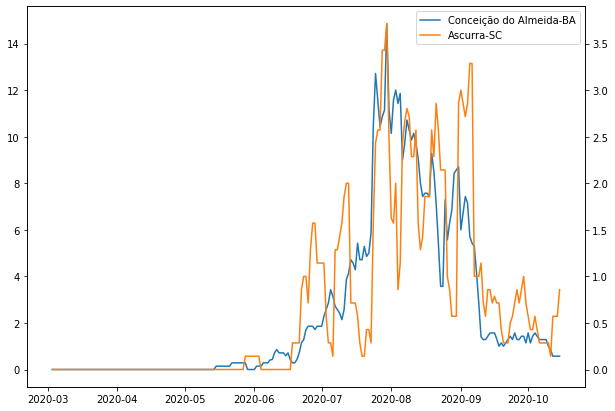

In [ ]:
fig,ax1 = plt.subplots(figsize=(10,7))
l1 = ax1.plot(df_cn['2908309'], label='Conceição do Almeida-BA')
ax2 = ax1.twinx()
l2=ax2.plot(df_cn['4201703'], c='C1', label='Ascurra-SC')
lns = l1+l2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)
plt.show()

Conceição do Almeida e Ascurra = coef AdAd = 0.7000079710042372, df = 1.901619170563908


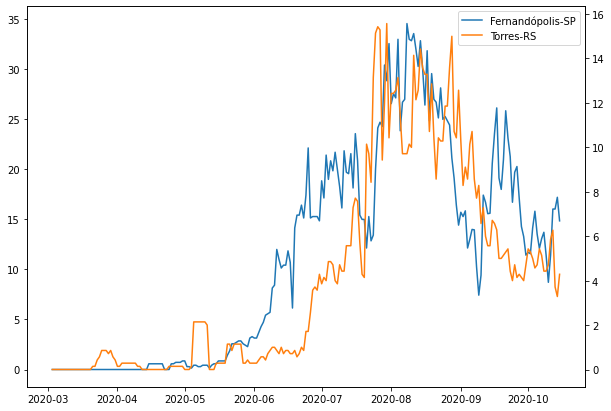

In [ ]:
fig,ax1 = plt.subplots(figsize=(10,7))
l1 = ax1.plot(df_cn['3515509'], label='Fernandópolis-SP')
ax2 = ax1.twinx()
l2=ax2.plot(df_cn['4321501'], c='C1', label='Torres-RS')
lns = l1+l2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)
plt.show()

Fernandópolis e Torres = coef AdAd = 16.238351516473795, df = 1.0082722938095814

### Distância x Similaridade

In [ ]:
adad_df = [(j, calculaDist((S.nodes[u]['latitude'], S.nodes[u]['longitude']),(S.nodes[v]['latitude'], S.nodes[v]['longitude']))/1000)
 for u, v, j in adad]

In [ ]:
print(adad_df)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
a = np.array([a for a,_ in adad_df])
d = np.array([d for _,d in adad_df])

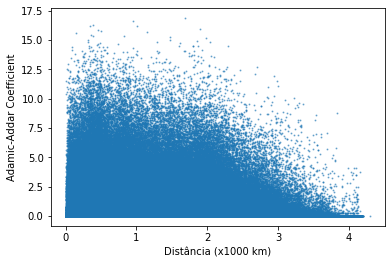

In [ ]:
plt.scatter(d,a, s=1, alpha=0.5)
plt.xlabel('Distância (x1000 km)')
plt.ylabel('Adamic-Addar Coefficient')
plt.show()

In [ ]:
np.corrcoef(d, a)

array([[ 1.        , -0.06001139],
       [-0.06001139,  1.        ]])